In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymorphy2
from collections import Counter
%matplotlib inline
import math

In [4]:
df = pd.read_csv('data_frame.csv', delimiter = ';')
df.head()
print(df['parsed'][0]), type(df['parsed'][0])

год работать устать лампочка гореть большой ничто


(None, str)

In [5]:
def merge_com(data):
    data = data.copy()
    for i in range(data.shape[0]):
        try:
            if math.isnan(data.commentNegative[i]):
                data.loc[i, 'hasNegComment'] = 0
        except TypeError:
            data.loc[i, 'comment'] = data.loc[i, 'comment'] + ' ' + data.loc[i, 'commentNegative']
            data.loc[i, 'hasNegComment'] = 1
       
        try:
            if math.isnan(data.commentPositive[i]):
                data.loc[i, 'hasPosComment'] = 0
        except TypeError:
            data.loc[i, 'comment'] = data.comment[i] + ' ' + data.commentPositive[i]
            data.loc[i, 'hasPosComment'] = 1
       
        data.loc[i, 'n_of_exc'] = data.loc[i, 'comment'].count('!')
        # if i%1000==0:
        #     print(i)
    return data.drop(['commentNegative', 'commentPositive'], axis=1)

In [6]:
import numpy as np
import nltk
from nltk.tokenize import WhitespaceTokenizer
from string import punctuation
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
mystopwords = []
#mystopwords = list(set(stopwords.words('russian')) - set(['не', 'нет', 'более','больше',  'ничего', "но", "хорошо", "лучше"])) + ["х","р", "тыс", "тыщ", "руб"] 

def parse_sentence(sent):
    sent = sent.replace('...', ' ')
    sent = sent.replace('-', ' ')
    sent = sent.replace('/', ' ')
    exclude = set(punctuation + '0123456789'+u'–—'+u'«»')
    merged_text = ''.join(ch for ch in sent if ch not in exclude)
    tokens = WhitespaceTokenizer().tokenize(merged_text.lower())
    tokens = [t_ for t_ in tokens if t_ not in mystopwords]
    tokens = [morph.parse(word)[0].normal_form for word in tokens]
    return np.array(tokens)

def count_exclamation(sent):
    c = 0
    for i in sent:
        if i == '!':
            c += 1
    return c

In [7]:
neg = df[df.reting < 2]
pos = df[df.reting > 3]

In [18]:
list(neg['parsed'])[0].split(' ')[0]

'сегодня'

In [98]:
pos = pos.dropna()

In [99]:
def top_words(data, n = 20): 
    al = []
    for a in data:
        for word in a.split():
            al.append(word)
    return Counter(al).most_common(n)

In [100]:
top_words(pos['parsed'])

[('не', 16056),
 ('очень', 6405),
 ('но', 4831),
 ('это', 3557),
 ('купить', 3539),
 ('хороший', 3445),
 ('год', 3144),
 ('весь', 2795),
 ('работать', 2305),
 ('отличный', 2300),
 ('пользоваться', 2202),
 ('довольный', 2140),
 ('просто', 1972),
 ('нет', 1932),
 ('один', 1728),
 ('качество', 1710),
 ('цена', 1682),
 ('такой', 1645),
 ('большой', 1635),
 ('модель', 1503)]

In [101]:
print(top_words(neg['parsed']), '\n\n', top_words(pos['parsed']))

[('не', 2300), ('купить', 498), ('но', 438), ('год', 423), ('очень', 405), ('это', 392), ('работать', 270), ('один', 263), ('месяц', 260), ('такой', 231), ('деньга', 213), ('хороший', 207), ('покупать', 206), ('день', 197), ('нет', 192), ('чайник', 185), ('вообще', 176), ('вода', 176), ('весь', 170), ('большой', 170)] 

 [('не', 16056), ('очень', 6405), ('но', 4831), ('это', 3557), ('купить', 3539), ('хороший', 3445), ('год', 3144), ('весь', 2795), ('работать', 2305), ('отличный', 2300), ('пользоваться', 2202), ('довольный', 2140), ('просто', 1972), ('нет', 1932), ('один', 1728), ('качество', 1710), ('цена', 1682), ('такой', 1645), ('большой', 1635), ('модель', 1503)]


In [104]:
def top_collocations(data, n = 20):
    al = []
    for a in data:
        loc = a.strip().split(' ')
        for ii in range(len(loc) - 1):
            al.append((loc[ii], loc[ii+1]))
    return Counter(al).most_common(n)

In [105]:
top_collocations(pos['parsed'])

[(('очень', 'довольный'), 919),
 (('не', 'пожалеть'), 572),
 (('очень', 'хороший'), 434),
 (('но', 'это'), 432),
 (('ничто', 'не'), 388),
 (('цена', 'качество'), 388),
 (('не', 'очень'), 388),
 (('год', 'назад'), 377),
 (('это', 'не'), 368),
 (('весь', 'советовать'), 360),
 (('очень', 'удобный'), 357),
 (('но', 'не'), 345),
 (('не', 'мочь'), 304),
 (('пока', 'не'), 295),
 (('очень', 'понравиться'), 289),
 (('пользоваться', 'год'), 287),
 (('очень', 'удобно'), 284),
 (('месяц', 'назад'), 270),
 (('очень', 'нравиться'), 256),
 (('не', 'знать'), 253)]

In [106]:
top_collocations(neg['parsed'])

[(('не', 'советовать'), 129),
 (('не', 'работать'), 56),
 (('не', 'рекомендовать'), 54),
 (('никто', 'не'), 53),
 (('вообще', 'не'), 52),
 (('не', 'брать'), 48),
 (('не', 'покупать'), 47),
 (('но', 'не'), 43),
 (('это', 'не'), 42),
 (('ничто', 'не'), 41),
 (('год', 'назад'), 37),
 (('перестать', 'работать'), 36),
 (('не', 'стоить'), 34),
 (('не', 'мочь'), 33),
 (('не', 'очень'), 32),
 (('не', 'знать'), 30),
 (('не', 'купить'), 29),
 (('половина', 'год'), 29),
 (('такой', 'деньга'), 29),
 (('сервисный', 'центр'), 28)]

In [205]:
top_collocations(neg['parsed'])

[(('не', 'советовать'), 129),
 (('не', 'работать'), 56),
 (('не', 'рекомендовать'), 54),
 (('никто', 'не'), 53),
 (('вообще', 'не'), 52),
 (('не', 'брать'), 48),
 (('не', 'покупать'), 47),
 (('но', 'не'), 43),
 (('это', 'не'), 42),
 (('ничто', 'не'), 41),
 (('год', 'назад'), 37),
 (('перестать', 'работать'), 36),
 (('не', 'стоить'), 34),
 (('не', 'мочь'), 33),
 (('не', 'очень'), 32),
 (('не', 'знать'), 30),
 (('не', 'купить'), 29),
 (('половина', 'год'), 29),
 (('такой', 'деньга'), 29),
 (('большой', 'не'), 28)]

In [208]:
sr = df[df.reting == 3]
top_collocations(sr['parsed'])

[(('не', 'очень'), 68),
 (('но', 'не'), 50),
 (('год', 'назад'), 49),
 (('это', 'не'), 46),
 (('не', 'знать'), 44),
 (('не', 'мочь'), 34),
 (('не', 'советовать'), 32),
 (('ничто', 'не'), 32),
 (('не', 'работать'), 32),
 (('очень', 'сильно'), 30),
 (('вообще', 'не'), 29),
 (('месяц', 'назад'), 28),
 (('но', 'это'), 27),
 (('не', 'плохой'), 27),
 (('очень', 'шумный'), 25),
 (('неделя', 'назад'), 24),
 (('не', 'хватать'), 24),
 (('не', 'стоить'), 23),
 (('не', 'понравиться'), 23),
 (('хороший', 'но'), 22)]

In [109]:
def top_trigramms(data, n = 20):
    al = []
    dic = []
    for a in data:
        loc = a.strip().split(' ')
        for ii in range(len(loc) - 2):
            al.append((loc[ii], loc[ii+1], loc[ii+2]))
    return Counter(al).most_common(n)

In [110]:
top_trigramms(pos['parsed'], n = len(pos['parsed']))

[(('соотношение', 'цена', 'качество'), 203),
 (('брать', 'не', 'пожалеть'), 158),
 (('но', 'это', 'не'), 113),
 (('очень', 'довольный', 'покупка'), 109),
 (('купить', 'месяц', 'назад'), 85),
 (('купить', 'год', 'назад'), 78),
 (('покупать', 'не', 'пожалеть'), 66),
 (('раз', 'не', 'пожалеть'), 60),
 (('год', 'очень', 'довольный'), 58),
 (('стоить', 'свой', 'деньга'), 58),
 (('купить', 'неделя', 'назад'), 52),
 (('остаться', 'очень', 'довольный'), 49),
 (('пользоваться', 'большой', 'год'), 44),
 (('не', 'очень', 'удобно'), 43),
 (('назад', 'очень', 'довольный'), 42),
 (('покупка', 'очень', 'довольный'), 41),
 (('никакой', 'проблема', 'не'), 36),
 (('занимать', 'мало', 'место'), 36),
 (('сочетание', 'цена', 'качество'), 34),
 (('пока', 'не', 'обнаружить'), 32),
 (('купить', 'данный', 'модель'), 32),
 (('год', 'раз', 'не'), 32),
 (('но', 'это', 'мелочь'), 31),
 (('работать', 'без', 'нарекание'), 31),
 (('раз', 'не', 'подвести'), 31),
 (('назад', 'сей', 'пора'), 30),
 (('сей', 'пора', 'рабо

In [111]:
top_trigramms(neg['parsed'])

[(('никто', 'не', 'советовать'), 29),
 (('не', 'советовать', 'покупать'), 22),
 (('не', 'советовать', 'брать'), 17),
 (('кой', 'случай', 'не'), 11),
 (('оставлять', 'желать', 'хороший'), 11),
 (('не', 'советовать', 'никто'), 10),
 (('деньга', 'не', 'стоить'), 8),
 (('свой', 'деньга', 'не'), 8),
 (('купить', 'год', 'назад'), 8),
 (('купить', 'день', 'назад'), 8),
 (('никогда', 'не', 'купить'), 7),
 (('купить', 'данный', 'модель'), 7),
 (('не', 'тратить', 'деньга'), 7),
 (('вообще', 'ничто', 'не'), 6),
 (('ремонт', 'не', 'подлежать'), 6),
 (('зря', 'потратить', 'деньга'), 6),
 (('никто', 'не', 'рекомендовать'), 6),
 (('не', 'рекомендовать', 'покупать'), 6),
 (('очень', 'не', 'удобно'), 5),
 (('жаль', 'потратить', 'деньга'), 5)]

In [229]:
lenn = pd.Series(lenn, name = 'len')

In [234]:
ndf = pd.concat([df, lenn], axis = 1)

In [237]:
import seaborn as sns

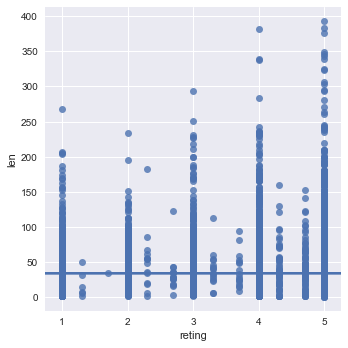

In [243]:
sns.lmplot('reting', 'len', ndf)

In [244]:
ndf.corr()

,sku,categoryLevel1Id,categoryLevel2Id,brandId,reting,hasNegComment,hasPosComment,n_of_exc,len
sku,1.000000,0.130009,0.144646,0.227148,0.018114,-0.021672,-0.021559,-0.014160,-0.051293
categoryLevel1Id,0.130009,1.000000,0.996477,0.069459,-0.050502,0.128753,0.128422,-0.038720,-0.023074
categoryLevel2Id,0.144646,0.996477,1.000000,0.089441,-0.048936,0.128587,0.128256,-0.038570,-0.024654
brandId,0.227148,0.069459,0.089441,1.000000,-0.040026,0.022855,0.022694,-0.013130,-0.014288
reting,0.018114,-0.050502,-0.048936,-0.040026,1.000000,0.007552,0.008200,0.072208,0.000203
hasNegComment,-0.021672,0.128753,0.128587,0.022855,0.007552,1.000000,0.999425,-0.004147,0.107204
hasPosComment,-0.021559,0.128422,0.128256,0.022694,0.008200,0.999425,1.000000,-0.004132,0.107097
n_of_exc,-0.014160,-0.038720,-0.038570,-0.013130,0.072208,-0.004147,-0.004132,1.000000,0.121820
len,-0.051293,-0.023074,-0.024654,-0.014288,0.000203,0.107204,0.107097,0.121820,1.000000


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [160]:
keep = {'reting': [1.0, 2.0, 3.0, 4.0, 5.0]}

newdf = df[df[list(keep)].isin(keep).all(axis=1)]

In [177]:
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(newdf['parsed'])

In [178]:
tfidf_features = tfidf.transform(newdf['parsed'])

In [179]:
lr = LogisticRegression().fit(tfidf_features, list(newdf['reting']))

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [182]:
clf = SVC(C = 1.0, kernel = 'linear')
scores = cross_val_score(clf, tfidf_features, list(newdf['reting']), cv=5)

In [183]:
scores.mean()

0.67166964783130789